# Pandas

In [2]:
import pandas as pd
import numpy as np
import html5lib

## 两种基本结构：
* Series  | 一维数组，能保存不同的数据类型
* DataFrame   | 二维数组

### 1. Series 

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
#,index=['a','b','c','d','e','f']) #index可变更索引号，缺省值为12345...
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [5]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [6]:
s[0]

1.0

#### 切片操作
变量名[A:B:C]
* A起始位置
* B结束位置（不包含B）
* C步长

In [7]:
s[2:5]

2    5.0
3    NaN
4    6.0
dtype: float64

In [8]:
s[::2]

0    1.0
2    5.0
4    6.0
dtype: float64

In [9]:
s.index.name='索引' #索引赋值
s

索引
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
s.index=list('abcdef')
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [11]:
s['a':'c']#与正常索引不同，区间会包含c

a    1.0
b    3.0
c    5.0
dtype: float64

## DataFrame

**通过各类方法生成二维数组**

In [12]:
date=pd.date_range('20180101',periods=6)
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df=pd.DataFrame(np.random.randn(6,4),index=date,columns=list('ABCD')) #index可以为list
df

,A,B,C,D
2018-01-01,-2.215470,1.178327,1.485599,-1.041013
2018-01-02,-0.593158,-0.760275,0.581925,-0.217323
2018-01-03,0.344874,-0.447070,-0.926444,0.351115
2018-01-04,0.981499,-0.516093,-0.037117,0.154929
2018-01-05,1.339876,0.065349,-0.710671,-1.599084
2018-01-06,-0.929235,-0.829088,1.504072,-0.129838


**通过字典生成二维数组**
* 每一行的数据格式可以不同
* 但每一列的数据格式必须相同

In [14]:
df2 = pd.DataFrame({'A':1,
                   'B':pd.Timestamp('20181001'),
                   'C':pd.Series(1,index=list(range(4)),dtype=float),
                   'D':np.array([3]*4,dtype=int),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'abc'})
df2

,A,B,C,D,E,F
0,1,2018-10-01,1.0,3,test,abc
1,1,2018-10-01,1.0,3,train,abc
2,1,2018-10-01,1.0,3,test,abc
3,1,2018-10-01,1.0,3,train,abc


# 查看数组

### 头尾数据
* head()
* tail()

*默认前五行*

In [15]:
df.head() 

,A,B,C,D
2018-01-01,-2.215470,1.178327,1.485599,-1.041013
2018-01-02,-0.593158,-0.760275,0.581925,-0.217323
2018-01-03,0.344874,-0.447070,-0.926444,0.351115
2018-01-04,0.981499,-0.516093,-0.037117,0.154929
2018-01-05,1.339876,0.065349,-0.710671,-1.599084


查看数据类型
* .dtypes

In [16]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

下标，列标，数据
* .index
* .columns
* .values

In [17]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[-2.21547046,  1.17832711,  1.48559904, -1.04101327],
       [-0.5931579 , -0.7602748 ,  0.58192488, -0.21732344],
       [ 0.34487389, -0.44707041, -0.92644421,  0.35111539],
       [ 0.98149876, -0.51609285, -0.0371174 ,  0.1549286 ],
       [ 1.3398756 ,  0.06534941, -0.71067105, -1.59908356],
       [-0.9292349 , -0.82908802,  1.50407156, -0.12983807]])

## pandas读取数据及数据操作

In [20]:
df = pd.read_excel('上海商户名单.xlsx') 
#使用绝对地址时在前面加r取消转义字符
#pd.read_excel(r'C:\Users\Bugco\Desktop\python\上海商户名单.xlsx')

In [21]:
df.tail(1)

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
256,saas初级版,上海,上海,2020-03-31,3月,上海金丽丰房地产纪有限公司


#### 行操作

In [22]:
df.iloc[0]

版本                          saas高级版
省份                               上海
城市                               上海
签约日期            2020-02-10 00:00:00
月份                              NaN
公司名称（合同名称全称）            瑞安市喜迎门房屋介绍所
Name: 0, dtype: object

In [23]:
df.iloc[0:5]

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
0,saas高级版,上海,上海,2020-02-10,NaN,瑞安市喜迎门房屋介绍所
1,saas初级版,上海,上海,2020-02-10,NaN,上海跃邻房地产经纪有限公司
2,saas初级版,上海,上海,2020-02-10,NaN,上海驿荣房地产经纪事务所
3,saas初级版,上海,上海,2020-02-10,NaN,上海多栖网络科技中心有限公司
4,saas初级版,上海,上海,2020-02-11,NaN,上海迁禧房地产营销策划有限公司宁波杭州湾新区分公司


In [24]:
df.loc[0:5]

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
0,saas高级版,上海,上海,2020-02-10,NaN,瑞安市喜迎门房屋介绍所
1,saas初级版,上海,上海,2020-02-10,NaN,上海跃邻房地产经纪有限公司
2,saas初级版,上海,上海,2020-02-10,NaN,上海驿荣房地产经纪事务所
3,saas初级版,上海,上海,2020-02-10,NaN,上海多栖网络科技中心有限公司
4,saas初级版,上海,上海,2020-02-11,NaN,上海迁禧房地产营销策划有限公司宁波杭州湾新区分公司
5,saas初级版,上海,上海,2020-02-11,NaN,上海象羡房地产经纪有限公司


## 修改数据
#### 添加一行

In [25]:
dit = {'版本':'新增版',
      '省份':'上海',
      '城市':'上海',
      '签约日期':'20220520',
      '月份':'',
      '公司名称（合同名称全称）':'新增门店'}

In [26]:
s=pd.Series(dit)
s.name=257
s

版本                   新增版
省份                    上海
城市                    上海
签约日期            20220520
月份                      
公司名称（合同名称全称）        新增门店
Name: 257, dtype: object

In [27]:
df = df.append(s)
df.tail(5)

C:\Users\Bugco\AppData\Local\Temp\ipykernel_11024\2845147052.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s)


,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
253,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海盛鸿房地产经纪事务所
254,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海敞淳房产经纪有限公司
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司
256,saas初级版,上海,上海,2020-03-31 00:00:00,3月,上海金丽丰房地产纪有限公司
257,新增版,上海,上海,20220520,,新增门店


In [28]:
#### 删除一行

In [29]:
df = df.drop([257])

In [30]:
df.tail()

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
252,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海承义房地产经纪有限公司
253,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海盛鸿房地产经纪事务所
254,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海敞淳房产经纪有限公司
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司
256,saas初级版,上海,上海,2020-03-31 00:00:00,3月,上海金丽丰房地产纪有限公司


### 列操作

In [31]:
df.columns

Index(['版本', '省份', '城市', '签约日期', '月份', '公司名称（合同名称全称）'], dtype='object')

In [32]:
df['版本'][0:5]

0    saas高级版
1    saas初级版
2    saas初级版
3    saas初级版
4    saas初级版
Name: 版本, dtype: object

In [33]:
df[['版本','省份']][:5]

,版本,省份
0,saas高级版,上海
1,saas初级版,上海
2,saas初级版,上海
3,saas初级版,上海
4,saas初级版,上海


#### 增加一列

In [34]:
df['门店ID']=range(1,len(df)+1)
df

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）,门店ID
0,saas高级版,上海,上海,2020-02-10 00:00:00,NaN,瑞安市喜迎门房屋介绍所,1
1,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海跃邻房地产经纪有限公司,2
2,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海驿荣房地产经纪事务所,3
3,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海多栖网络科技中心有限公司,4
4,saas初级版,上海,上海,2020-02-11 00:00:00,NaN,上海迁禧房地产营销策划有限公司宁波杭州湾新区分公司,5
...,...,...,...,...,...,...,...
252,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海承义房地产经纪有限公司,253
253,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海盛鸿房地产经纪事务所,254
254,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海敞淳房产经纪有限公司,255
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司,256


#### 删除一列

In [35]:
df = df.drop('门店ID',axis =1)
df

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
0,saas高级版,上海,上海,2020-02-10 00:00:00,NaN,瑞安市喜迎门房屋介绍所
1,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海跃邻房地产经纪有限公司
2,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海驿荣房地产经纪事务所
3,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海多栖网络科技中心有限公司
4,saas初级版,上海,上海,2020-02-11 00:00:00,NaN,上海迁禧房地产营销策划有限公司宁波杭州湾新区分公司
...,...,...,...,...,...,...
252,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海承义房地产经纪有限公司
253,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海盛鸿房地产经纪事务所
254,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海敞淳房产经纪有限公司
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司


#### 通过标签选择数据

In [36]:
df.loc[1,'版本']

'saas初级版'

In [37]:
df.loc[[1,3,4,6],['版本','城市']]

,版本,城市
1,saas初级版,上海
3,saas初级版,上海
4,saas初级版,上海
6,saas初级版,上海


#### 筛选条件
df[df['列名'] == 条件][范围]

In [38]:
df[df['版本'] == 'saas高级版'][:5]

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
0,saas高级版,上海,上海,2020-02-10 00:00:00,NaN,瑞安市喜迎门房屋介绍所
14,saas高级版,上海,上海,2020-02-12 00:00:00,NaN,上海曦惠房地产经纪事务所
22,saas高级版,上海,上海,2020-02-13 00:00:00,NaN,上海邸运房地产经纪有限公司
26,saas高级版,上海,上海,2020-02-14 00:00:00,NaN,上海锦万市场营销策划有限公司
33,saas高级版,上海,上海,2020-02-14 00:00:00,NaN,上海志佳网络服务中心


##### 多个条件

In [41]:
df[(df.版本 == 'saas高级版')&(df.城市 == '上海')]

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）
0,saas高级版,上海,上海,2020-02-10 00:00:00,NaN,瑞安市喜迎门房屋介绍所
14,saas高级版,上海,上海,2020-02-12 00:00:00,NaN,上海曦惠房地产经纪事务所
22,saas高级版,上海,上海,2020-02-13 00:00:00,NaN,上海邸运房地产经纪有限公司
26,saas高级版,上海,上海,2020-02-14 00:00:00,NaN,上海锦万市场营销策划有限公司
33,saas高级版,上海,上海,2020-02-14 00:00:00,NaN,上海志佳网络服务中心
36,saas高级版,上海,上海,2020-02-15 00:00:00,NaN,嘉兴飞帆房地产经纪有限公司
41,saas高级版,上海,上海,2020-02-15 00:00:00,NaN,浙江天诺房地产营销策划有限公司
57,saas高级版,上海,上海,2020-02-16 00:00:00,NaN,上海开亚置业有限公司
74,saas高级版,上海,上海,2020-02-19 00:00:00,NaN,上海凡克实业有限公司
80,saas高级版,上海,上海,2020-02-17 00:00:00,NaN,上海煜田实业有限公司


#### 缺失值及异常值处理
缺失值处理

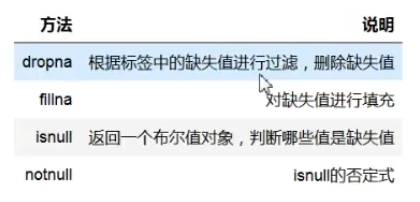

##### 判断缺失值

In [46]:
df[df['版本'].isnull()]

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）


#### 填充缺失值
fillna()

In [47]:
df['门店ID']=range(1,len(df)+1)
df

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）,门店ID
0,saas高级版,上海,上海,2020-02-10 00:00:00,NaN,瑞安市喜迎门房屋介绍所,1
1,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海跃邻房地产经纪有限公司,2
2,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海驿荣房地产经纪事务所,3
3,saas初级版,上海,上海,2020-02-10 00:00:00,NaN,上海多栖网络科技中心有限公司,4
4,saas初级版,上海,上海,2020-02-11 00:00:00,NaN,上海迁禧房地产营销策划有限公司宁波杭州湾新区分公司,5
...,...,...,...,...,...,...,...
252,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海承义房地产经纪有限公司,253
253,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海盛鸿房地产经纪事务所,254
254,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海敞淳房产经纪有限公司,255
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司,256


In [64]:
dit = {'版本':'新增版2',
      '省份':'上海',
      '城市':np.nan,
      '签约日期':'2022-05-31 00:00:00',
      '月份':np.nan,
      '公司名称（合同名称全称）':'新增门店'}
s = pd.Series(dit)
s.name=258
df = df.append(s)


C:\Users\Bugco\AppData\Local\Temp\ipykernel_11024\3508565578.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s)


In [65]:
df.tail()

,版本,省份,城市,签约日期,月份,公司名称（合同名称全称）,门店ID
255,saas初级版,上海,上海,2020-03-30 00:00:00,3月,上海嘉丞房地产经纪有限公司,256.0
256,saas初级版,上海,上海,2020-03-31 00:00:00,3月,上海金丽丰房地产纪有限公司,257.0
258,新增版2,上海,NaN,20220520,NaN,新增门店,NaN
258,新增版2,上海,NaN,2022-05-20,NaN,新增门店,NaN
258,新增版2,上海,NaN,2022-05-31 00:00:00,NaN,新增门店,NaN
